In [2]:
!pip install firebase


Word: data, Count: 332, URL: https://aws.amazon.com/documentation-overview/redshift/
Word: amazon, Count: 268, URL: https://aws.amazon.com/documentation-overview/redshift/
Word: sagemaker, Count: 245, URL: https://aws.amazon.com/documentation-overview/sagemaker/
Word: redshift, Count: 231, URL: https://aws.amazon.com/documentation-overview/redshift/
Word: model, Count: 215, URL: https://aws.amazon.com/documentation-overview/sagemaker/
Word: database, Count: 169, URL: https://aws.amazon.com/documentation-overview/relational-database-service/
Word: aws, Count: 142, URL: https://aws.amazon.com/documentation-overview/
Word: emr, Count: 142, URL: https://aws.amazon.com/documentation-overview/emr/
Word: rds, Count: 136, URL: https://aws.amazon.com/documentation-overview/relational-database-service/
Word: load, Count: 117, URL: https://aws.amazon.com/documentation-overview/elasticloadbalancing/


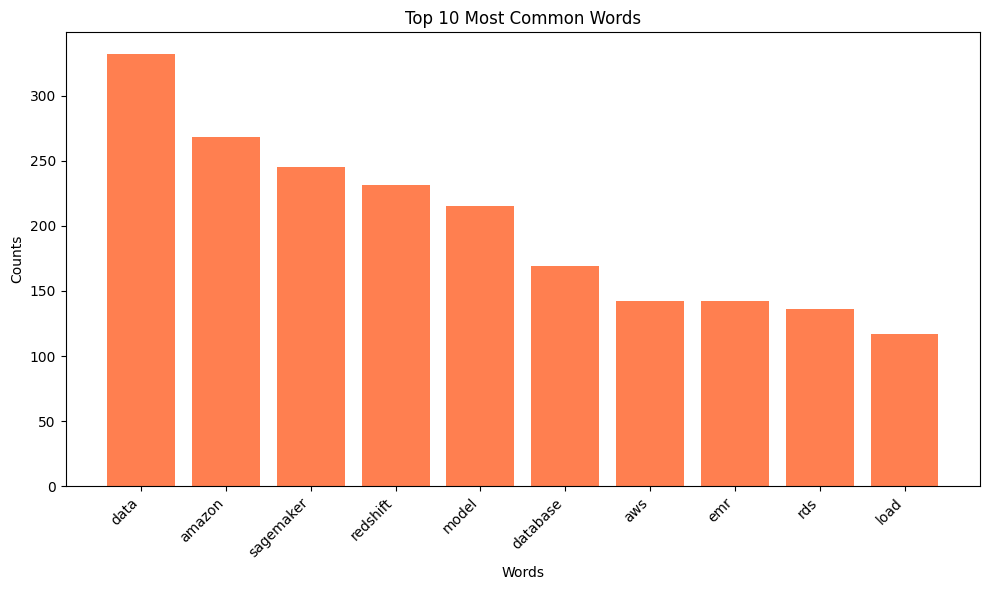

In [9]:
from firebase import firebase
import matplotlib.pyplot as plt
# Initialize Firebase connection
firebase = firebase.FirebaseApplication("https://kakadoo-db-default-rtdb.europe-west1.firebasedatabase.app/", None)

# Fetch the data
index = firebase.get("/index/", None)

def get_top_10_common_words(index):
    word_data = []

    # Iterate over each word in the index
    for word, details in index.items():
        if 'DocIDs' in details:
            # Get the document with the highest count for this word
            doc_with_max_count = max(details['DocIDs'].items(), key=lambda x: x[1]['count'])
            doc_id, doc_info = doc_with_max_count

            # Append word information
            word_data.append({
                'word': word,
                'count': doc_info['count'],
                'url': doc_info['url']
            })

    # Sort the words by count in descending order
    word_data.sort(key=lambda x: x['count'], reverse=True)

    # Get the top 10 most common words
    return word_data[:10]

# Get the 10 most common words
top_10_words = get_top_10_common_words(index)

# Print the results
for entry in top_10_words:
    print(f"Word: {entry['word']}, Count: {entry['count']}, URL: {entry['url']}")

# Prepare data for the graph
words = [entry['word'] for entry in top_10_words]
counts = [entry['count'] for entry in top_10_words]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='coral')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()